In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# 데이터 셋 불러오기

In [105]:
df = pd.read_csv(r'titanic\train.csv')

# 요약 정보 확인

In [106]:
df.info()
#categorical data가 많다 --> age, Fare 만 continuous data --> categorical로 맞춰주자.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 결측치 1차 확인

In [107]:
print(df.isnull().sum()) #Age, Cabin, Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# 데이터 확인

In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


상관관계 1차 분석

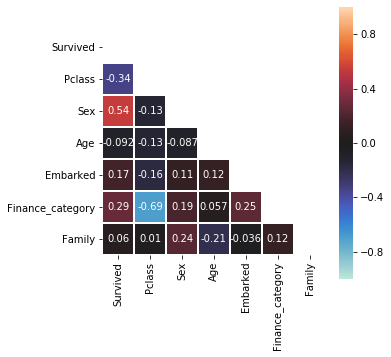

In [110]:
corr = data.corr() # corr = df.corr()
mask = np.tril(m = corr.to_numpy(), k = -1) #삼각행렬 만들기(대각성분 제외)
lower_func = np.vectorize(lambda x: x==0 ) #numpy에 적용 가능한 함수 만들기
mask = lower_func(mask) #mask == True이면, heatmap에 표시되지 않는다.

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(corr, vmin = -1, vmax = +1,center=0, robust=False, annot = True, mask = mask, linewidths=.5, cbar=True, square=True, xticklabels=True, yticklabels=True, ax = ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+.5, top-.5)
plt.show()

상관관계가 높은 순서로 분석한다.

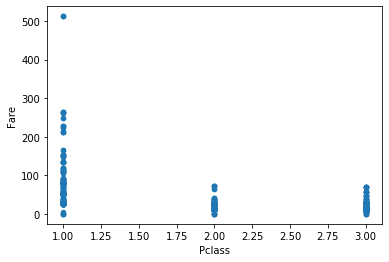

In [111]:
#1. pclass - fare(categorical - continuous data)
pclass_fare = df[['Pclass', 'Fare']].copy(deep=True)
pclass_fare.plot.scatter(x='Pclass', y='Fare')
plt.show()
#1등석 손님이 가격을 더 많이 제시한다. ==> 역수 관계

In [112]:
#outlier 확인(500) --> 3명이다.
outlier = df[df['Fare']>=400]
print(outlier)
#동일한 ticket number로 보아, 단체일 것이다.
#비슷한 연령 --> 친구사이?
#승선 장소 동일
func = np.vectorize(lambda x : 'Martinez' in x)
mask = func(df['Name'])
family = []
for i,bol in enumerate(mask):
    if bol == True:
        family.append(i)
print(family) #parch는 1인데, 동일한 성씨를 가진 탑승객이 없다. --> human error로 판단하자. -> 0으로 변경
df.loc[679,'Parch'] = 0 # 값을 수정할 때, tuple로 원하는 위치를 보내야 하기 때문에 loc를 이용한다.

#outlier 3개를 제외한 mean + 3sigma로 수정한다.
fare_mean = df['Fare'].mean()
fare_std = df['Fare'].std()
df.loc[outlier.index,'Fare'] = fare_mean + fare_std*3

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C  
[679]


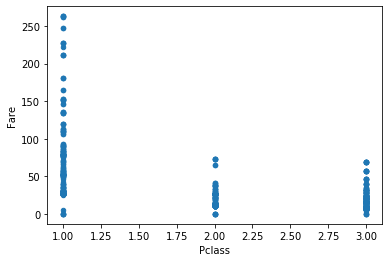

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
PassengerId    0 non-null int64
Survived       0 non-null int64
Pclass         0 non-null int64
Name           0 non-null object
Sex            0 non-null object
Age            0 non-null float64
SibSp          0 non-null int64
Parch          0 non-null int64
Ticket         0 non-null object
Fare           0 non-null float64
Cabin          0 non-null object
Embarked       0 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 0.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 27 to 779
Data columns (total 12 columns):
PassengerId    17 non-null int64
Survived       17 non-null int64
Pclass         17 non-null int64
Name           17 non-null object
Sex            17 non-null object
Age            15 non-null float64
SibSp          17 non-null int64
Parch          17 non-null int64
Ticket         17 non-null object
Fare           17 non-null float64
Cabin  

In [113]:
df[['Pclass', 'Fare']].plot.scatter(x = 'Pclass', y = 'Fare')
plt.show()
df[df['Fare'] < (fare_mean-3*fare_std)].info()
df[df['Fare'] > (fare_mean+3*fare_std)].info()
#Fare outlier 제거 완료

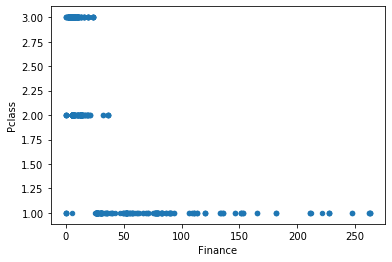

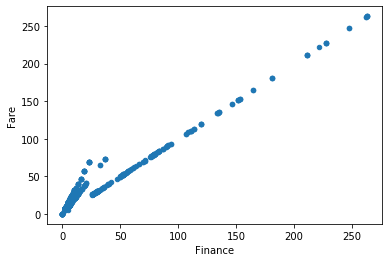

In [114]:
#fare/pclass의 새로운 클래스를 만들어 재정 상황에 따른 변수를 만든다.
df['Finance'] = df['Fare']/df['Pclass']
df[['Finance','Pclass']].plot.scatter(x='Finance',y='Pclass')
plt.show()

df[['Finance','Fare']].plot.scatter(x='Finance',y='Fare')
plt.show()

#Fare 대체 가능(관계식 형성)
df.drop(['Fare'], axis=1,inplace=True)

# Finance를 categorical data로 변환

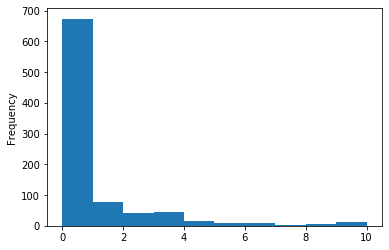

In [115]:
#50 단위로 끊는다.
df['Finance_category'] = (df['Finance']/25).apply(int)
df['Finance_category'].plot.hist()
plt.show()
df.drop(['Finance'], axis=1, inplace=True)

Parch, Sibsp 분석

In [116]:
parch_sibsp = df[['SibSp','Parch']]
print(parch_sibsp['SibSp'].unique())
print(parch_sibsp['Parch'].unique())
# 둘 모두 가족 관계를 나타내므로, 하나로 합친다.
df['Family'] = parch_sibsp.sum(axis=1)
df.drop(['SibSp', 'Parch'], axis=1, inplace = True)

[1 0 3 4 2 5 8]
[0 1 2 5 3 4 6]


In [117]:
df.Family.unique()
#category 줄이기 --> 현재 0 ~ 10 존재. 0, [1,2], [3,4], [5,6], [7,10]

for idx, n in enumerate(df.Family.values):
    new_key = -1
    
    if n<1 :
        new_key = 0
    elif 1<=n<=2:
        new_key = 1
    elif 3<=n<=4:
        new_key = 2
    elif 5<=n<=6:
        new_key = 3
    else:
        new_key=4
    df.loc[idx, 'Family'] = new_key

In [118]:
df.Family.describe()

count    891.000000
mean       0.565657
std        0.865642
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Family, dtype: float64

# Embarked 분석

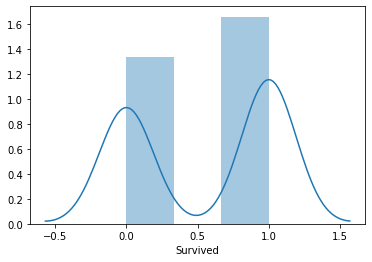

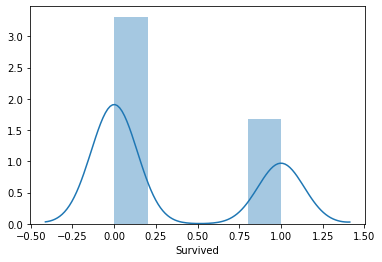

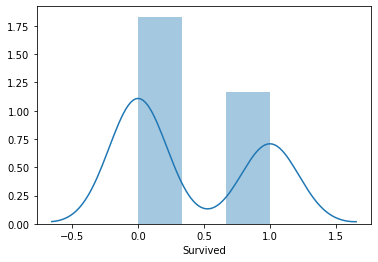

In [119]:
embarked = df[['Embarked','Survived']]

#1. 정수로 변환
sns.distplot(embarked[embarked['Embarked']=='C'].Survived)
plt.show()
sns.distplot(embarked[embarked['Embarked']=='S'].Survived)
plt.show()
sns.distplot(embarked[embarked['Embarked']=='Q'].Survived)
plt.show()

#S = 0, Q = 1, C = 2로 변환
df = df.replace(['S','Q','C'],[0,1,2])

# Sex 분석

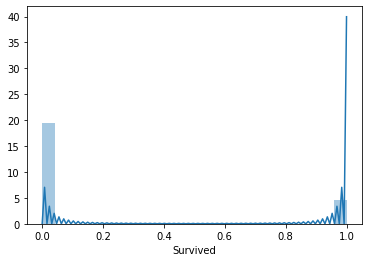

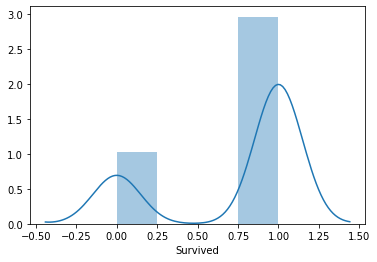

In [120]:
sex = df[['Sex', 'Survived']]
#정수로 변환
sns.distplot(sex[sex['Sex']=='male'].Survived)
plt.show()
sns.distplot(sex[sex['Sex']=='female'].Survived)
plt.show()
#male = 0, female = 1로 변환
df = df.replace(['male','female'],[0,1])

# Age 분석

In [121]:
age = df[['Age','Survived']]
age.head()
age.tail() # Nan 존재
print(age.isnull().sum())

missing_age = df[age.isnull()]


#outlier 확인
print(df.Age[df.Age>df.Age.mean()+3*df.Age.std()]) #2개 발견
print(df.Age[df.Age<df.Age.mean()-3*df.Age.std()])

outlier_idx = df.Age[df.Age>df.Age.mean()+3*df.Age.std()].index
df.loc[outlier_idx, 'Age'] = df.Age.mean()+3*df.Age.std()

Age         177
Survived      0
dtype: int64
630    80.0
851    74.0
Name: Age, dtype: float64
Series([], Name: Age, dtype: float64)


In [77]:
#Survived 여부에 따라 가중 평균 값으로 채운다.
dead, live = age['Age'].groupby(age['Survived']).mean().values #groupby는 통계적 분석과 동시에 사용해야 한다
print(dead, live)
survived = df['Survived']
live_percentage = survived.sum()/survived.shape[0]
dead_percentage = 1 - live_percentage
print(live_percentage, dead_percentage) #약 4:6
weighted_mean = dead*dead_percentage + live*live_percentage

df.Age.fillna(value = weighted_mean, inplace = True)

30.62617924528302 28.343689655172415
0.3838383838383838 0.6161616161616161


# Age를 Categorical data로 변환

0    1.0
1    2.0
2    1.0
3    2.0
4    2.0
Name: Age, dtype: float64

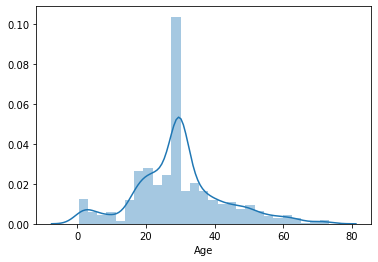

In [20]:
sns.distplot(df.Age)

#0~19, 20~29, 30~39,40~49,50~으로 분할
for idx in df.index:
    new_value = -1
    data = df.iloc[idx]
    
    if data.Age <= 19:
        new_value = 0
    elif 20 <= data.Age <= 29:
        new_value = 1
    elif 30 <= data.Age <= 39:
        new_value = 2
    elif 40 <= data.Age <= 49:
        new_value = 3
    else:
        new_value = 4

    df.loc[idx, 'Age'] = new_value
df.Age.head()

# Cabin 분석

In [21]:
cabin = df['Cabin']
cabin.head()
cabin.tail()
print('missing : {}'.format(cabin.isnull().sum()/cabin.shape[0]))

#missing value가 너무 많기 때문에 제외한다.
df.drop(['Cabin'], axis = 1, inplace = True)

missing : 0.7710437710437711


# 이용 불가능한 key 제거

In [22]:
#ticket은 이용하기 힘들다
df.drop(['Ticket'], axis=1, inplace = True)

In [23]:
#Name 또한 이용하지 않는다.
df.drop(['Name'], axis = 1, inplace = True)

In [24]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Embarked',
       'Finance', 'Family'],
      dtype='object')

# <출력 형식 : PassengerID : Survived>

In [25]:
def split_id_data(df):
    return df['PassengerId'], df.drop(['PassengerId'], axis=1)

In [26]:
id, data_df = split_id_data(df)

In [32]:
#save
df.to_csv(r'titanic\train_cleaning.csv', index=False)

# Preprocessing 정리
0. target과의 상관관계 확인(상관관계를 높이는 방향으로 전처리를 한다.)
1. head, tail, nan 확인
2. outlier 확인 및 정리(mean+-3*std 초과/미만을 outlier로)
3. nan을 적당한 값으로 채우기(범주형 --> mode로, 연속형 --> 평균, 가중 평균 등으로)<outlier 처리 후, 다시 평균 등을 구해야 한다.>
4. 비슷한 속성의 column들을 합치거나, 나누거나, 범주형을 연속형으로, 연속형을 범주형으로 만드는 등의 일을 하여 feature engineering을 한다.
5. 이하 모든 feature에 대해 반복한다.
6. option : object 속성의 feature는 int or float 속성으로 바꾼다
7. Normalize : model fitting 단계에서 train mean, train std를 고정하여 진행한다.

In [8]:
def preprocessing(df, save_path = None):
    
    #0. copy df
    df = df.copy(deep=True)
    
    #1. Pclass, Fare
    
    #1.1 Pclass --> outlier x
    df.Pclass.fillna(value = df.Pclass.mode(), inplace = True) 
    
    #1.2 Fare
    fare_mean = df['Fare'].mean()
    fare_std = df['Fare'].std()
    
    #1.2.1 outlier 탐색
    outlier = df[df['Fare']>fare_mean+fare_std*3]
    df.loc[outlier.index,'Fare'] = fare_mean + fare_std*3
    
    outlier = df[df['Fare']<fare_mean-fare_std*3]
    df.loc[outlier.index,'Fare'] = fare_mean - fare_std*3
    
    #1.2.2 nan 채우기
    fare_mean = df['Fare'].mean() # outlier를 처리한 후
    df.Fare.fillna(value = fare_mean, inplace = True)
    
    #1.2.3 Finance 생성(새로운 feature)
    df['Finance'] = df['Fare']/df['Pclass']
    df.drop(['Fare'], axis=1,inplace=True)
    
    #1.2.4 Finance Category로 변경
    df['Finance_category'] = (df['Finance']/25).apply(int)
    df.drop(['Finance'], axis=1, inplace=True)
    
    #2. Family 생성(Parch, Sibsp)
    df['Family'] = df[['Parch','SibSp']].sum(axis=1)
    df.drop(['SibSp', 'Parch'], axis=1, inplace = True)
    
    #2.1 Family Category reduction
    for idx, n in enumerate(df.Family.values):
        new_key = -1
        if n<1 :
            new_key = 0
        elif 1<=n<=2:
            new_key = 1
        elif 3<=n<=4:
            new_key = 2
        elif 5<=n<=6:
            new_key = 3
        else:
            new_key=4
        df.loc[idx, 'Family'] = new_key
    
    #3. Embarked
    def mode(data):
        preq = {key:0 for key in data.unique()}
        for key in data:
            preq[key]+=1
        return max(preq.values())
    
    df.Embarked.fillna(value=mode(df.Embarked), inplace = True)
    df = df.replace(['S','Q','C'],[0,1,2])
    
    #4. Sex
    df = df.replace(['male','female'],[0,1])
    
    #5. Age
    outlier = df.Age[df.Age>df.Age.mean()+3*df.Age.std()]
    df.loc[outlier.index, 'Age'] = df.Age.mean()+3*df.Age.std()
    
    outlier = df.Age[df.Age<df.Age.mean()-3*df.Age.std()]
    df.loc[outlier.index, 'Age'] = df.Age.mean()-3*df.Age.std()
    
    #train_data에서 확인
    dead_mean = 30.62617924528302 
    live_mean = 28.343689655172415
    
    weights = {'dead' : 0.6, 'live' : 0.4} # train 비율에 기반
    
    weighted_mean = dead_mean*weights['dead'] + live_mean*weights['live']
    df.Age.fillna(value = weighted_mean, inplace = True)
    
    #5.1 Age를 Categorical data
    for idx in df.index:
        new_value = -1
        data = df.iloc[idx]
        if data.Age <= 19:
            new_value = 0
        elif 20 <= data.Age <= 29:
            new_value = 1
        elif 30 <= data.Age <= 39:
            new_value = 2
        elif 40 <= data.Age <= 49:
            new_value = 3
        else:
            new_value = 4
        df.loc[idx, 'Age'] = new_value
        
    #6. Cabin
    df.drop(['Cabin'], axis = 1, inplace = True)
    
    #7. Ticket
    df.drop(['Ticket'], axis=1, inplace = True)
    
    #8. Name
    df.drop(['Name'], axis = 1, inplace = True)
    
    #9. save dataset
    df.to_csv(save_path, index = False)
    
    #10. split id, data
    def split_id_data(df):
        return df['PassengerId'], df.drop(['PassengerId'], axis=1)
    
    return split_id_data(df)

# Train, Test Preprocessing

In [9]:
preprocessing(pd.read_csv(r'titanic\train.csv'), save_path = r'titanic\clean_data\train_clearn.csv')
preprocessing(pd.read_csv(r'titanic\test.csv'), save_path = r'titanic\clean_data\test_clearn.csv')

(0       892
 1       893
 2       894
 3       895
 4       896
        ... 
 413    1305
 414    1306
 415    1307
 416    1308
 417    1309
 Name: PassengerId, Length: 418, dtype: int64,
      Pclass  Sex  Age  Embarked  Finance_category  Family
 0         3    0  2.0         1                 0       0
 1         3    1  3.0         0                 0       1
 2         2    0  4.0         1                 0       0
 3         3    0  1.0         0                 0       0
 4         3    1  1.0         0                 0       1
 ..      ...  ...  ...       ...               ...     ...
 413       3    0  4.0         0                 0       0
 414       1    1  2.0         2                 4       0
 415       3    0  2.0         0                 0       0
 416       3    0  4.0         0                 0       0
 417       3    0  4.0         2                 0       1
 
 [418 rows x 6 columns])